##### Creating Dataset

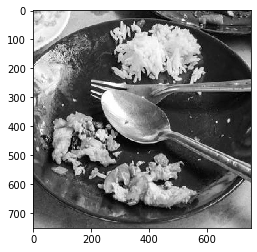

[[234 235 233 ...   8  20  11]
 [245 244 241 ...  41  51  45]
 [245 244 246 ...  50  51  44]
 [247 245 253 ...  53  49  43]
 [233 227 235 ... 105 103 105]]

(750, 750)


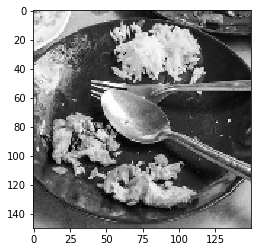

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm


DATADIR = "C:/Users/alina/OneDrive/Desktop/foos/one"
CATEGORIES = ["leftovers", "meal"]

for category in CATEGORIES: 
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        plt.imshow(img_array, cmap='gray') 
        plt.show()  # display!

        break 
    break 
    
print(img_array[:5])
print('')
print(img_array.shape)

IMG_SIZE = 150

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [2]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do lefovers and meal

        path = os.path.join(DATADIR,category)  # create path to lefovers and meal
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0= leftovers 1=meal

        for img in tqdm(os.listdir(path)):  # iterate over each image per lefovers and meal
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e: 
                pass

create_training_data()

print(len(training_data))

import random
random.shuffle(training_data)

100%|██████████| 43/43 [00:00<00:00, 220.77it/s]

125


##### Reshaping

In [3]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[170]
   [174]
   [179]
   ...
   [ 39]
   [ 45]
   [ 48]]

  [[176]
   [175]
   [173]
   ...
   [ 46]
   [ 47]
   [ 47]]

  [[151]
   [153]
   [153]
   ...
   [ 49]
   [ 53]
   [ 62]]

  ...

  [[114]
   [128]
   [126]
   ...
   [ 83]
   [ 79]
   [ 80]]

  [[ 46]
   [ 82]
   [122]
   ...
   [ 81]
   [ 82]
   [ 82]]

  [[ 40]
   [ 54]
   [111]
   ...
   [ 79]
   [ 82]
   [ 83]]]]


##### Train/Test Split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

print('Train set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

Train set shape: (106, 150, 150, 1)
Test set shape: (19, 150, 150, 1)


##### Import Libraries

In [5]:
!pip install keras
!pip install tensorflow

In [6]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical


import numpy as np
import pandas as pd 
import os, time
import matplotlib.pyplot as plt
from matplotlib import pyplot

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.6.0
2.6.0


##### Reshaping

In [7]:
X_train = X_train.reshape((106, 150 * 150))
X_test = X_test.reshape((19, 150 * 150))

# Converting images into 3 channels
X_train = np.dstack([X_train]*3)
X_test = np.dstack([X_test]*3)

X_train = X_train.reshape((106, 150, 150,3))
X_test = X_test.reshape((19, 150, 150,3))

# Resizing the images 50*50
from keras.preprocessing.image import img_to_array, array_to_img
X_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((50,50))) for im in X_train])
X_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((50,50))) for im in X_test])

# Data Shape:
print("test_images shape: ",X_train.shape)
print("test_images shape: ",X_test.shape)

test_images shape:  (106, 50, 50, 3)
test_images shape:  (19, 50, 50, 3)


##### To categorical

In [8]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

print('Train shape:', y_train_one_hot.shape)
print('Test shape:', y_test_one_hot.shape)

Train shape: (106, 2)
Test shape: (19, 2)


##### Notmalization

In [9]:
X_train = X_train/255
X_test = X_test/255
X_test_2 = X_test

##### Model and compilation

In [10]:
model = tf.keras.Sequential([                       
    tf.keras.layers.Flatten(input_shape=(50,50,3)), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),       
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer='normal'),  
    tf.keras.layers.Dense(2, activation='softmax')     
])                                                     


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

##### Training

In [11]:
hist = model.fit(X_train, y_train_one_hot,
                batch_size=10,
                epochs=30)

Epoch 1/30
11/11 [==============================] - 1s 15ms/step - loss: 5.5578 - accuracy: 0.6887
Epoch 2/30
11/11 [==============================] - 0s 15ms/step - loss: 5.4134 - accuracy: 0.8019
Epoch 3/30
11/11 [==============================] - 0s 15ms/step - loss: 1.7872 - accuracy: 0.8774
Epoch 4/30
11/11 [==============================] - 0s 15ms/step - loss: 2.5472 - accuracy: 0.8585
Epoch 5/30
11/11 [==============================] - 0s 15ms/step - loss: 0.9230 - accuracy: 0.8962
Epoch 6/30
11/11 [==============================] - 0s 16ms/step - loss: 1.8938 - accuracy: 0.8962
Epoch 7/30
11/11 [==============================] - 0s 15ms/step - loss: 0.5000 - accuracy: 0.9528
Epoch 8/30
11/11 [==============================] - 0s 15ms/step - loss: 0.3018 - accuracy: 0.9717
Epoch 9/30
11/11 [==============================] - 0s 15ms/step - loss: 0.3027 - accuracy: 0.9528
Epoch 10/30
11/11 [==============================] - 0s 15ms/step - loss: 0.3129 - accuracy: 0.9528
Epoch 11/

##### Accuracy

In [12]:
model.evaluate(X_test, y_test_one_hot)

1/1 [==============================] - 0s 125ms/step - loss: 1.7225 - accuracy: 0.8421


[1.7225327491760254, 0.8421052694320679]

##### Accuracy Plot

Text(0.5, 0, 'Epoch')

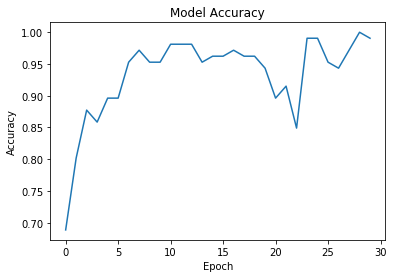

In [13]:
#Visualize the model accuracy
plt.plot(hist.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

##### Prediction overview

In [14]:
for i in range(0,14):
  predictions = model.predict(X_test)
  print(predictions[i])
  print('The predicted value:', np.argmax(predictions[i]))
  print('An actual value:', y_test[i])

[1. 0.]
The predicted value: 0
An actual value: 0
[9.9993253e-01 6.7409885e-05]
The predicted value: 0
An actual value: 0
[1.000000e+00 5.628784e-12]
The predicted value: 0
An actual value: 0
[1. 0.]
The predicted value: 0
An actual value: 0
[1. 0.]
The predicted value: 0
An actual value: 0
[0.02415937 0.9758406 ]
The predicted value: 1
An actual value: 0
[0.38508716 0.61491287]
The predicted value: 1
An actual value: 1
[6.0037968e-05 9.9993992e-01]
The predicted value: 1
An actual value: 1
[1. 0.]
The predicted value: 0
An actual value: 0
[7.217487e-07 9.999993e-01]
The predicted value: 1
An actual value: 1
[1.000000e+00 8.282339e-09]
The predicted value: 0
An actual value: 1
[1.0154666e-05 9.9998987e-01]
The predicted value: 1
An actual value: 1
[1. 0.]
The predicted value: 0
An actual value: 0
[9.9995029e-01 4.9707523e-05]
The predicted value: 0
An actual value: 1


##### Leftovers image

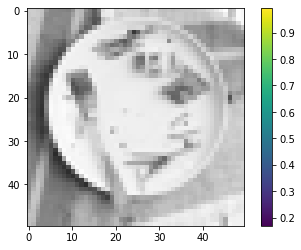

In [15]:
plt.figure()
plt.imshow(X_test_2[0])
plt.colorbar()
plt.grid(False)
plt.show()

##### Meal image

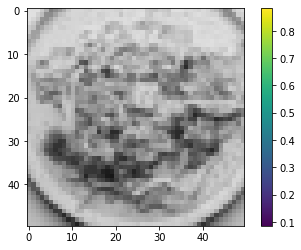

In [16]:
plt.figure()
plt.imshow(X_test_2[13])
plt.colorbar()
plt.grid(False)
plt.show()